# 건강기능식품 소비 수요 조사

In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'


In [25]:
cd ~/WorkSpace/navercafecrawling/홀푸드코리아

/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아


In [26]:
ls

건강기능식품분석.ipynb      홀푸드코리아.csv
업종별성별카드이용정보.csv  홀푸드코리아블로그크롤링.ipynb


In [27]:
df = pd.read_csv('업종별성별카드이용정보.csv')

In [82]:
df2 = pd.read_csv('제주채소류재배현황.csv')

In [47]:
df.columns

Index(['연월', '업종명', '이용자구분', '성별', '이용자수', '이용건수', '이용금액'], dtype='object')

In [49]:
df.연월.value_counts()

201906    322
201911    321
201912    320
201907    320
201905    319
201810    318
201910    315
201807    315
201908    314
201904    313
201811    313
201808    312
201809    312
202001    310
201812    308
201909    308
201805    307
201903    305
201806    305
201902    302
201804    301
201901    301
202002    299
201803    290
202107    288
201801    287
202008    283
202010    279
201802    278
202109    277
202103    277
202106    277
202105    277
202009    277
202011    276
202003    274
202102    272
202005    272
202007    271
202108    271
202004    270
202104    270
202006    268
202012    267
202101    265
Name: 연월, dtype: int64

In [59]:
df.head(2)

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470


In [64]:
int(df.연월[0]/100)

2018

In [66]:
df['연'] = df['연월'].apply(lambda x : int(x/100))

In [69]:
df.연.value_counts()

2019    3760
2018    3646
2020    3346
2021    2474
Name: 연, dtype: int64

In [72]:
df.columns

Index(['연월', '업종명', '이용자구분', '성별', '이용자수', '이용건수', '이용금액', '연'], dtype='object')

In [73]:
df.업종명.unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업',
       '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업',
       '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓',
       '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업',
       '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자, 햄버거, 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '택시 운송업'],
      dtype=object)

<AxesSubplot:xlabel='연'>

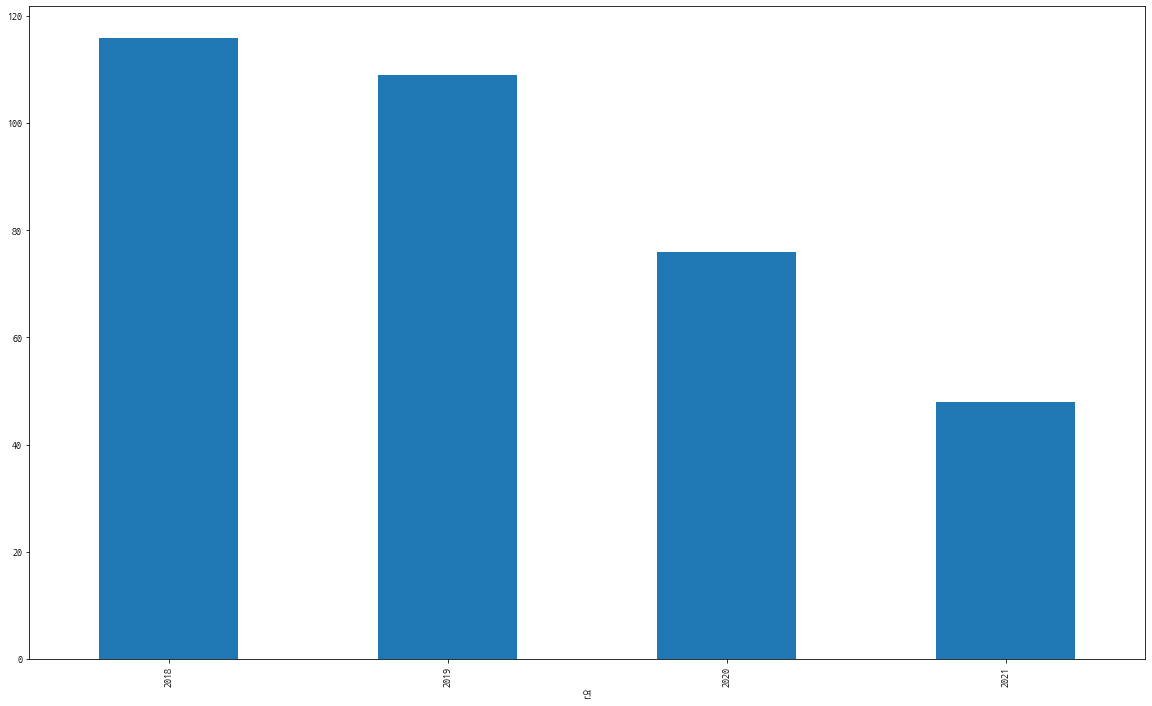

In [78]:
plt.figure(figsize=(20,12))
df[df.업종명=='건강보조식품 소매업'].groupby([df.연]).연.count().plot.bar()

<AxesSubplot:xlabel='연'>

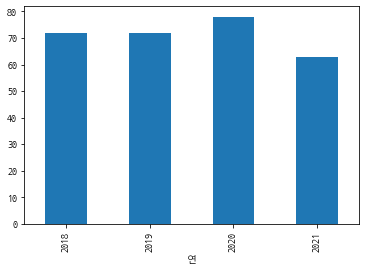

In [80]:
df[df.업종명=='기타음식료품위주종합소매업'].groupby([df.연]).연.count().plot.bar()

# 결론
- 오프라인 기준 건강보조식품과 기타음식료품위주 소매업은 감소하였다

In [85]:
df2.columns

Index(['연산', '채소구분대분류', '채소구분소분류', '면적(ha)', '생산량(톤)', '조수입(백만원)', '데이터 기준일'], dtype='object')

In [97]:
df3 = copy.deepcopy(df2[df2.채소구분소분류 =='양배추'])

In [101]:
df3.reset_index(inplace=True,drop=True)

In [110]:
df3

,연산,채소구분대분류,채소구분소분류,면적(ha),생산량(톤),조수입(백만원),데이터 기준일
0,20-21,노지채소,양배추,1753.0,103222.0,60116.0,20210809
1,19-20,노지채소,양배추,1721.0,78005.0,87167.0,20210809
2,18-19,노지채소,양배추,2038.0,94128.0,37086.0,20210809
3,17-18,노지채소,양배추,1999.0,93544.0,63610.0,20210809
4,16-17,노지채소,양배추,1986.0,100879.0,115268.0,20210809
5,15-16,노지채소,양배추,1910.0,110429.0,76872.0,20210809


<AxesSubplot:>

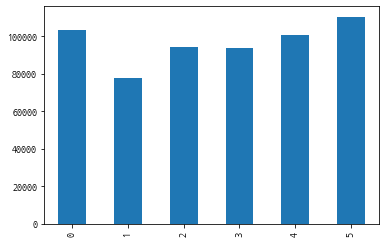

In [120]:
df3['생산량(톤)'].plot.bar()

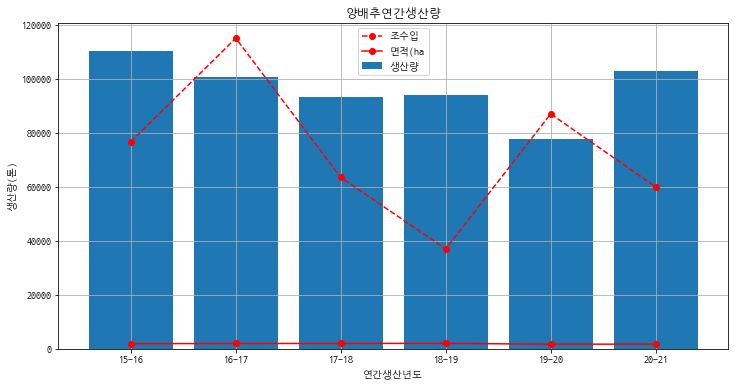

In [153]:
plt.figure(figsize=(12,6))
plt.bar(df3['연산'][::-1],df3['생산량(톤)'][::-1],label = '생산량')
plt.legend()
plt.plot(df3['연산'][::-1],df3['조수입(백만원)'][::-1],'ro--',label = '조수입')
plt.plot(df3['연산'][::-1],df3['면적(ha)'][::-1],'ro-',label = '면적(ha')
plt.legend()
plt.ylabel('생산량(톤)')
plt.xlabel('연간생산년도')
plt.title('양배추연간생산량')
plt.grid()

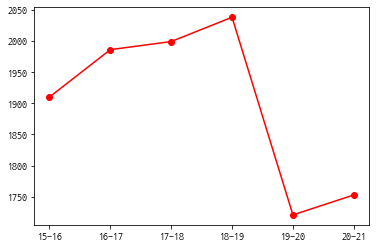

In [154]:
plt.plot(df3['연산'][::-1],df3['면적(ha)'][::-1],'ro-',label = '면적(ha')